# Travail final
# Jean-Simon Fortin

# Objectif

## Tel que mentionné dans le plan, l'objectif de ce travail est d'utiliser l'apprentissage automatique afin de prédire/classifier si une personne a perdu ou gagné dans une tâche de gambling à partir de l'activité cérérbrale des participants. Plus précisément, ils s'agit d'une étude en IRMf, donc un parle du signal BOLD  (Blood-oxygen-level-dependent imaging). Les voxels sélectionnés font partie du tronc cérébral et de son entourage. Nous avons les bêtas pour 7962 voxels (notre nombre de prédicteurs) et 46 outcomes (gain vs perte) à prédire.

# Hypothèse
# Notre hypothèse est que nos variables x (les bêtas des 7962 voxels) nous permettrons de classifier l’outcome (gagné vs perdu).

## Note: après avoir consulté certains experts, j'ai décidé de ne pas utiliser de "feature_scaling" dans le cadre de ce projet puisque mes features sont déjà des bêtas.

In [68]:
#Importation des modules qui seront utilisés 
import pandas as pd 
import numpy as np
import sklearn 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
import plotly.express as px

#let's create dataframe from Excel file
df = pd.read_excel("JeanSimonFortin_données_psy4016-H22_20220211_AXIAL_data (2).xlsx", header=None)

 

#Malheureusement, le nombre de colonnes maximum dans sqlite3 est de 2000 colonnes, alors que j'en ai beaucoup plus que cela.
#https://www.sqlite.org/limits.html#max_column. Je ne peux donc pas utiliser sqlite3 pour mon projet. pour démontrer ma compréhension,
#je ai tout de meme fait un code  permettant de transformer les 10 premières colonnes de mes données en sqlite3 afin de ne 
#pas perdre mes points pour sqlite3. on voit ici que j'ai créé la fonction from_df_to_sql() qui me permet de transférer mon dataframe vers sqlite3.
#voici de code en commentaire ci-bas, aveec la query à la fin!

#import sqlite3 as sq
#df = df.iloc[2:,1:11]

#write my dataframe ti sql
#def from_df_to_sql():
#    table_name = "Gaambling_IRMf" 
#    conn = sq.connect('{}.sqlite'.format(table_name)) # creates file
#    df.to_sql(table_name, conn, if_exists='replace', index=False) # writes to file
#    conn.commit()
#    conn.close() # good practice: close connection
     
#from_df_to_sql()


In [71]:
#UTILISATION D'AU MOINS UNE CLASSE!!!!!!!
class table_preprocessing():
    def drop_colomuns_Y(df):
        Y_column_selection = df[1]
        Y = Y_column_selection.drop([0,1], axis=0)
        return Y
    
    def zero_index_Y(Y):
        Y.index = [np.arange(0,Y.shape[0])]
        return Y
 
    def drop_colomuns_lines_X(df):
        X_drop_columns= df.drop([0,1], axis=1)
        X= X_drop_columns.drop([0,1], axis=0)
        return X
        
    def zero_index_X(X):    
        X.index = [np.arange(0,X.shape[0])]
        X.columns = [np.arange(0,X.shape[1])] 
        return X

In [72]:
#let's go ahead and create a table y (outcome) and a table x (predictors)
#Table Y (Outcome

#ici on sélectionne la deuxième colonne (celle des outcomes) et on retire les 2 premières lgines car ce ne sont pas des données
Y = table_preprocessing.drop_colomuns_Y(df)
#ensuite, on recrée un index qui débute à 0.
Y = table_preprocessing.zero_index_Y(Y)


#Table X (predictors).
#ici, on drop les 2 premières colonnes et les 2 premières lignes car ce ne sont pas des données
X = table_preprocessing.drop_colomuns_lines_X(df) 
#ensuite, on recrée un index qui débute à 0.
X = table_preprocessing.zero_index_X(X) 

In [73]:
#afin de démontrer ma capacité à utiliser une structure DE PIPELINE (CRITÈRE DE CORRECTION), j'ai choisi de mettre ma fonction
# qui gère les erreurs dans un fichier ipynb externe et de la rouler avec le code suivant:
%run "error_handling.ipynb"
 
#j'ai laissé mon script de gesiton d'erreur en commentaire ci-bas pour éviter au correcteur d'avoir à aller 
#dans l'autre fichier:    
    
#GESTION DES ERREURS

#for i in range(0, len(X.columns)): #pour les toutes les colonnes
 #   column = X[i].values.tolist() # on transforme la colonne en une liste
  #  flat_list = [item for sublist in column for item in sublist]
   # for x in flat_list:
#       try:
#           float(x)
#       except:
#           X = X.drop([i], axis=1) 
            
#TABLEAU D'OUTCOMES (Y)
#Ici, je suis supposé avoir seulement des 0 et des 1. Dans l'éventualité où il y aurait des valeurs autres que 0 et 1, 
#mon code va transformer ces valeurs en "missing values". Ces valeurs seront traités à l'étape suivante.

#column = Y.values.tolist() 
#list_of_missing = []
#compteur = 0
#for x in column :
 #   if x == '1' or x == '0' :
  #      pass
   # else:
    #    list_of_missing.append(int(compteur))
    #compteur = compteur + 1    
    
#drop = list_of_missing
#Y= Y.drop(drop, axis=0)

X is printed and afterward Y is printed
         0          1          2            3            4          5     \
0    0.006275  -0.003967  -0.005363    -0.004504     0.003862   0.000293   
1    0.007313    0.00792   0.006078     0.004551     0.011269   0.013502   
2    0.005659  -0.000202   0.002567     0.004891     0.003183  -0.001077   
3   -0.000823   0.000244  -0.000497      0.00224    -0.004415  -0.003145   
4   -0.019375  -0.010769   -0.00742    -0.008265    -0.008169   0.001163   
5   -0.004004  -0.005706  -0.007355     0.004315    -0.007077  -0.005296   
6    0.002165    0.00579   0.007617     0.008769    -0.000456   0.001374   
7   -0.004435  -0.002592  -0.007576    -0.009347    -0.003215   0.004614   
8    0.028019    0.02068   0.016292     0.009649     0.016247   0.016205   
9   -0.001648   0.003611   0.000269     0.000472     0.000734  -0.004867   
11   0.008309   0.006597   0.002673    -0.000896     0.007106   0.005596   
12  -0.000514  -0.003638  -0.004901   8.2387e-05

In [74]:
#PRISE EN CONSIDÉRATION DE LA PRÉSENCE POTENTIELLE DE VALEURS MANQUANTES 

# TABLEAU PRÉDICTEURS 
#Comme j'ai une quantité énorme de features et peu de valeurs manquantes,
#je peux me permettre de supprimer les colonnes où au moins un élément est manquant.

#UTILISATION DE LA FONCTION ANONYME ICI (LAMBDA!!!!!) 
#ici on supprime les colonnes vides DANS X
dropping_functionX = lambda X: X.dropna(axis='columns') 
X = dropping_functionX(X)

# pour mon tableau Y 
dropping_functionY = lambda Y: Y.dropna(axis= 0) 
Y = dropping_functionY(Y) 

## Apprentissage supervisé

In [75]:
#Importantions
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
import seaborn as sns

#CROSS-VALIDATION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=999)

#CRÉATION DE PIPELINES (les fichiers ont une structure de pipeline )

pipeline_logistic_regression=Pipeline([('scaler1', sklearn.preprocessing.StandardScaler()),('logisticreg_classifier', 
                             linear_model.LogisticRegressionCV(cv=3, penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9],
                                                               solver='saga',max_iter=5000))])
pipeline_random_forest=Pipeline([('scaler2', sklearn.preprocessing.StandardScaler()),('random_forest_classifier', 
                             RandomForestClassifier())])
pipelines = [pipeline_logistic_regression,pipeline_random_forest]

best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

In [77]:
#dictionnare de pipelines et classifier
pipe_dict = {0: 'C\'est la régression logistique ',1: 'C\'est random_forest '} #formattage des chaines utilisé ici

In [78]:
for pipe in pipelines:
    pipe.fit(X_train,y_train)
    
    
for i, model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i], model.score(X_test,y_test))) # Le formattage des chaînes est ENCORE utilisé 
    #ici afin de démontre ma compréhension du concept de formattage des chaînes. 
    
    
for i,mode in enumerate(pipelines):
    if model.score(X_test, y_test)>best_accuracy:
        best_accuracyacyacyt_accurracy = model.score(X_test,y_test)
        best_pipeline = model
        best_classifier = i
print('Classifier_with_best_accuracy:{}'.format(pipe_dict[best_classifier])) #utilisation du formattage des chaînes ici    

C:\Users\Utilisateur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

C:\Users\Utilisateur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

C:\Users\Utilisateur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Utilisateur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\Utilisateur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklea

C'est la régression logistique  Test Accuracy:0.42857142857142855
C'est random_forest  Test Accuracy:0.2857142857142857


C:\Users\Utilisateur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

C:\Users\Utilisateur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

C:\Users\Utilisateur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



Classifier_with_best_accuracy:C'est random_forest 


# Graphique pour apprentissage supervisé (2%)

C:\Users\Utilisateur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Utilisateur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



<AxesSubplot:xlabel='x_tsne', ylabel='y_tsne'>

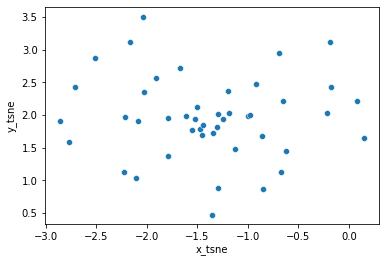

In [79]:
#il va sans dire que dans un cadre de données comme le mien, il ne ferait aucun sens de faire un graphique avec plus
#de 7900 dimensions, j'ai donc choisi de d'utiliser TSNE pour plotter mes données sur deux dimensions.

m = TSNE(learning_rate=50)

tsne_features = m.fit_transform(X)


x_tsne = tsne_features[:,0] 

y_tsne = tsne_features[:,1]

df_tsne = pd.DataFrame()
df_tsne['x_tsne'] = x_tsne
df_tsne['y_tsne'] = y_tsne
df_tsne

sns.scatterplot(x='x_tsne',y='y_tsne', data = df_tsne)

C:\Users\Utilisateur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

C:\Users\Utilisateur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

C:\Users\Utilisateur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



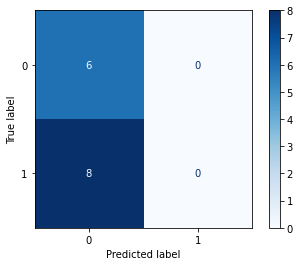

In [80]:
#let's import classification_report and confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


clf = LogisticRegressionCV()
clf.fit(X_train,y_train)
disp = plot_confusion_matrix(clf, X_test,y_test,cmap='Blues')

# Apprentissage NON-supervisé

In [81]:
#Dans leur article intitulé "Machine learning in resting-state fMRI analysis", Khosla et al. (2019)  mettent en évidence 
#le fait que les analyses non-supervisées doivent elles jouer un rôle dans le monde de l'IRMf. Un des algorithmes dont ils ventent 
# les mérites est l'analyse en composantes principales.

##Load libraries
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA
 
#analyse    
pca = decomposition.PCA(n_components=2) #two clusters (win and lose)
pca.fit(X) 


#scores pour l'analyse
scores = pca.transform(X)
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2'])
scores_df

C:\Users\Utilisateur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

C:\Users\Utilisateur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



,PC1,PC2
0,-0.216211,-0.046171
1,-0.016777,0.036251
2,-0.078678,0.038075
3,0.072093,0.032669
4,0.018297,0.280627
5,-0.175509,-0.112788
6,-0.156633,-0.068616
7,0.090655,-0.008946
8,0.105073,0.013447
9,0.043433,0.022018


In [82]:
#nous allons créer un ALGORITHME D'AUTOMATISATION (AFIN DE 
#RÉPONDRE AU CRITÈRE "AU MONS UN ALGORITHME D'AUTOMATISATION EST UTILISÉ"). ICI, ON VA UTILISER L'ALGORITHME DE RECHERCHE
#LINÉAIRE QUI VA NOUS PERMETTRE DE s'assurer que nous avons biens À LA FOIS DES des gagnants et des perdants DANS NOTRE TABLEAU
def linear_search_win(Y):
    for i in Y:
        if i == '1':
            return print("Nous avons bel et bien des gagnants")   
             
            
def linear_search_lose(Y):
    for i in Y:
        if i == '0':
            return print("Nous avons bel et bien des perdants")  

linear_search_win(Y)
linear_search_lose(Y)


Y_label = []
for i in Y:
    if i == '0':
        Y_label.append('lose')
    elif i == '1':
        Y_label.append('win')


Outcome = pd.DataFrame(Y_label, columns=['Outcome'])
df_scores = pd.concat([scores_df, Outcome], axis=1)


loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index= X.columns )
df_loadings

Nous avons bel et bien des gagnants
Nous avons bel et bien des perdants


,PC1,PC2
0,0.007674,-0.021907
1,0.024864,-0.019681
2,0.022280,-0.021347
3,0.012026,-0.024277
4,0.020219,0.005831
...,...,...
7957,0.009723,0.019700
7958,0.011468,0.020482
7959,0.015710,0.017243
7960,0.013801,0.013306


In [83]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.11107454, 0.06038589])

# Graphique pour apprentissage NONsupervisé (2%)

In [84]:
#preprocessing avant de faire les graphiques
explained_variance = np.insert(explained_variance, 0, 0)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.111075,0.111
2,PC2,0.060386,0.171
3,PC3,NaN,NaN


In [85]:
#GRAPHIQUE POUR LA VARIANCE EXPLIQUÉE

 

fig = px.bar(df_explained_variance, 
             x='PC', y='Explained Variance',
             text='Explained Variance',
             width=800)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [86]:
#variance expliquée + variance cumulative en %
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

##  Rapport, description des résultats (1%)

Résultats
Mes résulats n'ont pas été dans le sens que j'avais anticipé. en effet, je croyais que je serais en mesure d'avoir une efficacité d'autour de 80-90% dans ma classsification avec l'algorithme de régression logistique(ou SVM). Ce n'est pourtant pas ce qui s'est produit du tout. J'ai plutôt eu un taux de réussite inférieur à 50%... Ces résultat vont donc à l'encontre des découvertes faites par plusieurs auteurs selon lesquelles le tronc cérébral jouerait un rôle dans l ecodage de l'information liée à un ou gain ou une perte dans une tâche de gambling. 

Concernant les résultats pour l'apprentissage non supervisé, disons que mon dataset n'était peut-être pas toout à fait approprié pour ce genre d'apprentissage. Plusieurs auteurs l'ont mentionné (ex:Amr Abdullatif,Luis Argerich, etc): un trop grand nombre de features peut être très néfaste dans les cas de l'apprentissage non supervisé, c'est ce que plusieurs ont nommé le "maleur de de la diimensionalité... Il n'est donc pas surpenant d'apprendre que mes résultats n'ont pas donnée lieu à des grandes découvertes. En effet, mes clusters expliquent très peu de variance...